In [105]:
from numpy import genfromtxt
import numpy as np
from numpy import *
import matplotlib
import csv
from scipy import sparse
%pylab
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import sparse as sp
from sklearn import random_projection
from mpl_toolkits.mplot3d import Axes3D


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


#Import Data

In [42]:
description = genfromtxt('description.csv', delimiter=',')
graph  = genfromtxt('graph.csv', delimiter=',')
social_evolution = genfromtxt('social_and_evolution.csv', delimiter=',')

#CCA FUNCTION

In [78]:
def pca(A,d):
    meanA=(average(A,0))
    centA=A-meanA
    sigA=transpose(matrix(A))*matrix(A)
    lambdaA,wA=linalg.eig(sigA)
    WA=zeros((size(A,1),d))
    for i in range(0,d):
        WA[:,i]=real(transpose(wA[:,i]))
    yA=matrix(A)*matrix(WA)
    return yA

In [79]:
def cca(XA,XB,d):
    XA_c=matrix(XA-average(XA,0))
    XB_c=matrix(XB-average(XB,0))
    sig11=transpose(XA_c)*XA_c
    sig12=transpose(XA_c)*XB_c
    sig22=transpose(XB_c)*XB_c
    sig21=transpose(XB_c)*XA_c
    lambdaA,wA=linalg.eigh(inv(sig11)*sig12*inv(sig22)*sig21)
    ind=argsort(lambdaA)[::-1]
    return XA_c*matrix(wA[:,ind[0:d]])

#CCA 1 ON DESCRIPTION AND SOCIAL EVOLUTION

In [44]:
m=1829
n=8000
X_dat=genfromtxt('description.csv',delimiter=',')
X_c1=sparse.coo_matrix((m,n))
X_c1.data=X_dat[:,2].astype(float64)
X_c1.row=X_dat[:,0].astype(int32)
X_c1.col=X_dat[:,1].astype(int32)
description_X=X_c1.todense()

In [98]:
cca1 = cca(social_evolution,description_X,3)

#CCA 2 ON CCA 1 AND GRAPH

In [99]:
cca1.shape

(1829, 3)

In [100]:
Y=genfromtxt('Y.csv',delimiter=',')

In [101]:
cca2 = cca(cca1,Y,3)

In [102]:
cca2[[12,1419,865,146,1653,1176]]

matrix([[ 0.13082038, -0.12108663, -0.07668325],
        [ 0.03238718, -0.05152482,  0.06909988],
        [ 0.08452341,  0.16005507,  0.04668343],
        [-0.01863872, -0.04637729, -0.04259592],
        [ 0.12759626, -0.06367534, -0.11174648],
        [ 0.02322563, -0.0404705 , -0.04279815]])

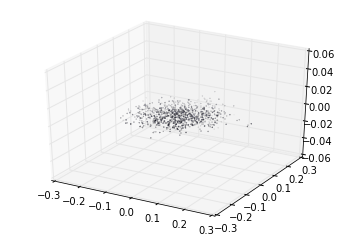

In [128]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter(cca2[:,0],cca2[:,1],cca2[:,2],zdir='z')

In [129]:
savetxt('y2',cca2,delimiter=',')

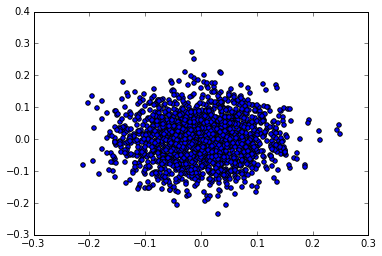

In [53]:
scatter(cca2[:,0],cca2[:,1])

#OTHER

In [38]:
cca1_3dim = cca(social_evolution,Y,3)

In [88]:
data = go.Scatter3d(
    x=cca1_3dim[:,0],
    y=cca1_3dim[:,1],
    z=cca1_3dim[:,2],
)
fig = go.Figure(data=[data])
py.iplot(fig, filename='simple-3d-scatter')